In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
# from reading_averaging_utils import (read_and_average_virtual_exp, average_stat_over_targets, average_stat_over_backgrounds)
from reading_averaging_utils import summarize_average_models_dot_boundary

In [ ]:
# python collect_jobs_and_clean.py /scratch2/smaruj/virtual_insertion_dots_OUT_dots_m0 -d /home1/smaruj/akitaX1-analyses/experiments/virtual_insertion_dots_vs_boundaries/input_data/dot_CTCFs_jaspar_filtered_mm10_strong_dots.tsv -v -l

In [3]:
data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_dots_vs_boundaries/boundary_windows"

In [4]:
models_number = 8

In [6]:
df = summarize_average_models_dot_boundary(data_dir, models_number, ignore_keys=["insertion_SCD", "disruption_SCD"])

## Correlation between boundary and dot SCD

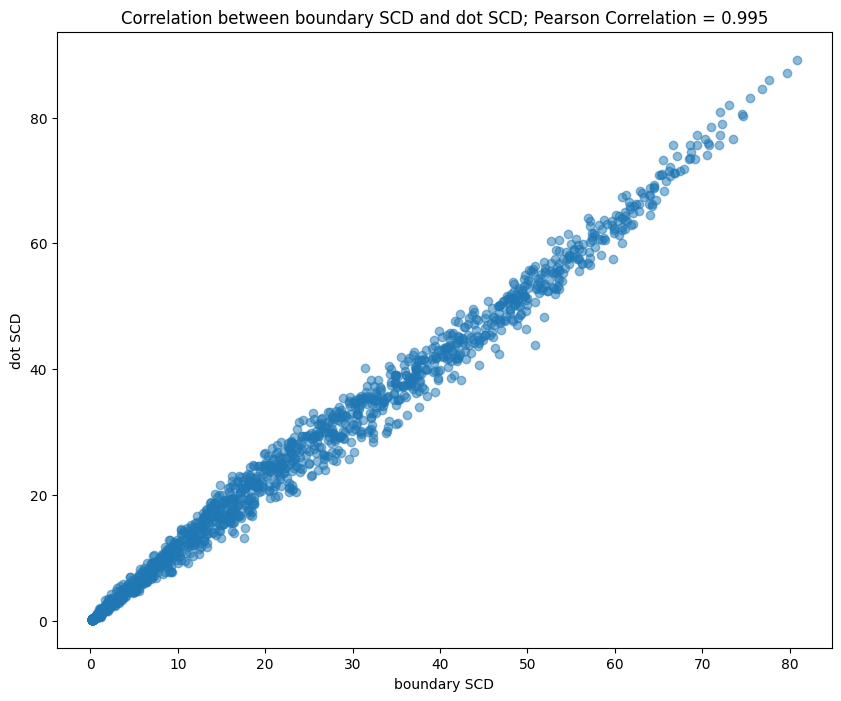

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df["SCD_B"], df["SCD_D"], alpha=0.5)

pearson_corr = stats.pearsonr(df["SCD_B"], df["SCD_D"]).statistic
rounded_pearson_corr = round(pearson_corr, 3)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("dot SCD")

ax.set_title(f"Correlation between boundary SCD and dot SCD; Pearson Correlation = {rounded_pearson_corr}")

# plt.savefig("./plots/boundarySCD_vs_dotSCD.png", bbox_inches="tight")

plt.show()

## Boundary SCD vs. cross-score

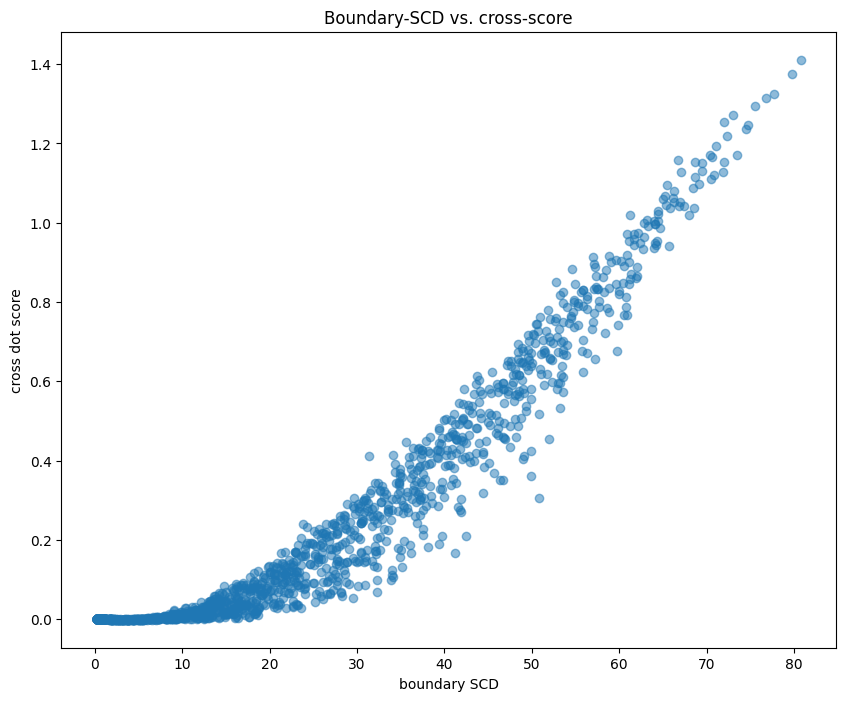

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df["SCD_B"], df["cross-score"], alpha=0.5)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("cross dot score")

ax.set_title("Boundary-SCD vs. cross-score")

# plt.savefig("./plots/boundarySCD_vs_cross-score.png", bbox_inches="tight")

plt.show()


## Boundary-SCD vs. dot-score

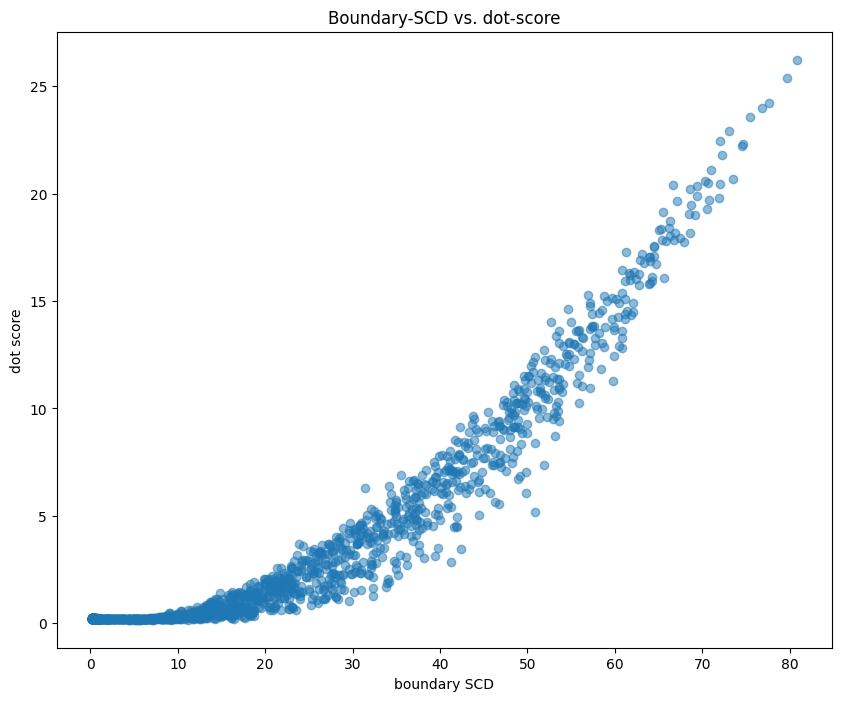

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df["SCD_B"], df["dot-score"], alpha=0.5)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("dot score")

ax.set_title("Boundary-SCD vs. dot-score")

# plt.savefig("./plots/boundarySCD_vs_dot-score.png", bbox_inches="tight")

plt.show()

## Boundary-SCD vs. x-score

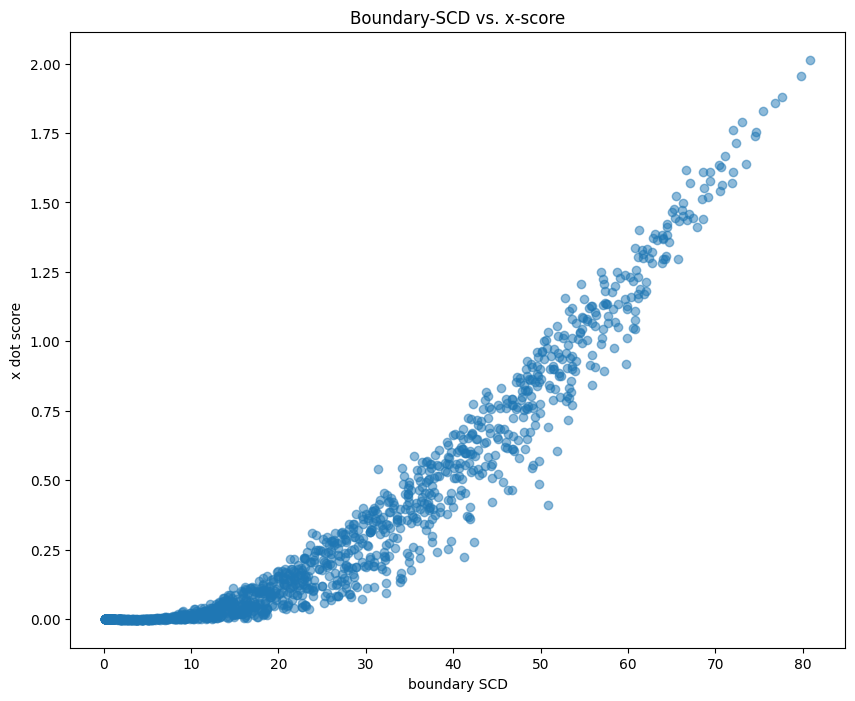

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df["SCD_B"], df["x-score"], alpha=0.5)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("x dot score")

ax.set_title("Boundary-SCD vs. x-score")

# plt.savefig("./plots/boundarySCD_vs_x-score.png", bbox_inches="tight")

plt.show()

## Scatterplot with histograms on the margins

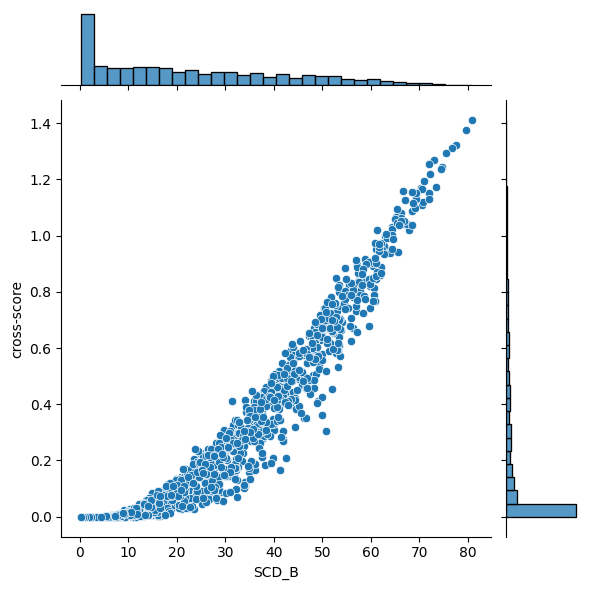

In [13]:
sns.jointplot(
    x=df["SCD_B"], y=df["cross-score"], marginal_kws=dict(bins=30, fill=True),
)

## Picking a representative (visually) set of points to plot them

In [14]:
picked_indiced = [112, 10, 101, 368, 1326, 412]

In [15]:
picked_for_plotting = df.loc[picked_indiced].reset_index(drop=True)

In [17]:
# saving
# picked_for_plotting.to_csv("picked_for_plotting.tsv", sep="\t", index=False)

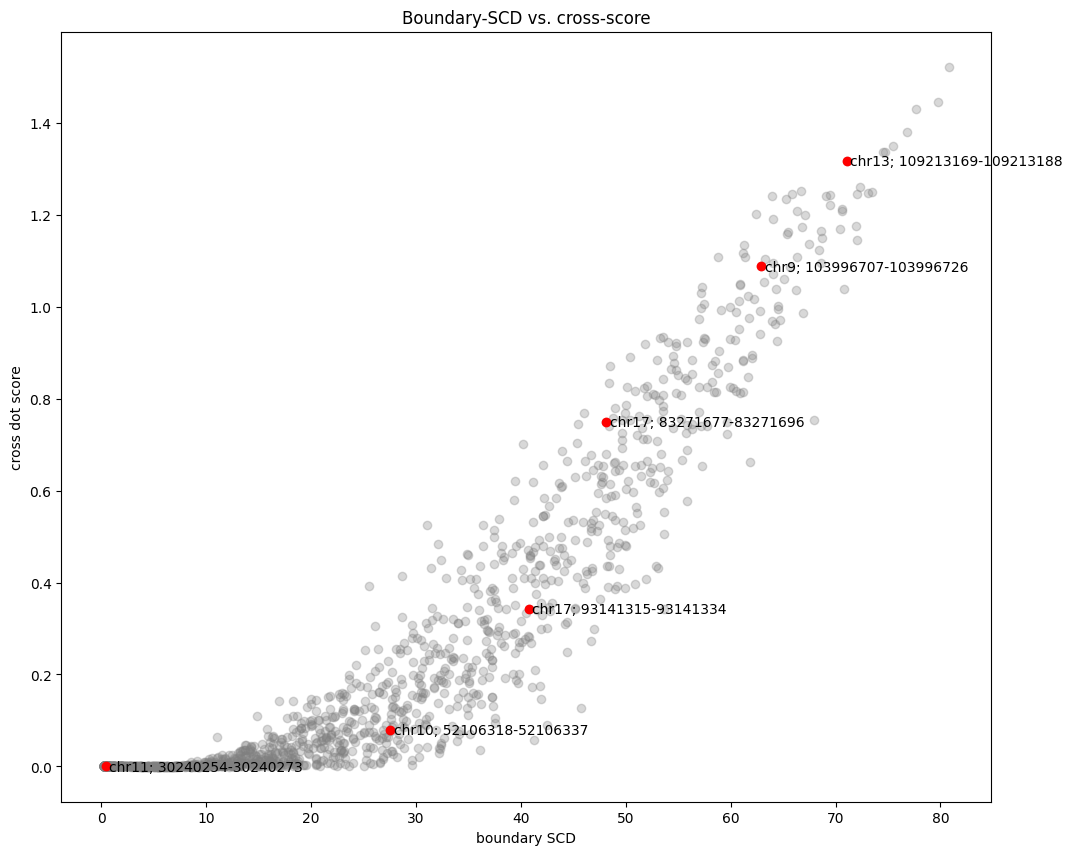

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))

scatter = ax.scatter(df["SCD_B"], df["cross-score_m0"], c = "gray", alpha=0.3)
scatter = ax.scatter(df["SCD_B"].iloc[picked_indiced], df["cross-score_m0"].iloc[picked_indiced], c="red")

for index in picked_indiced:
    ID = f"{df.chrom.iloc[index]}; {df.start.iloc[index]}-{df.end.iloc[index]}"
    plt.text(df["SCD_B"].iloc[index]+0.35, df["cross-score_m0"].iloc[index]-0.01, ID, horizontalalignment='left', color='black')

ax.set_xlabel("boundary SCD")
ax.set_ylabel("cross dot score")

ax.set_title("Boundary-SCD vs. cross-score")

plt.show()